In [1]:
# !pip3 install tensorflow==2.17

In [2]:
# !7z x "/content/Tables (Data set).zip"

In [3]:
# from google.colab import drive
# drive.mount(r'/content/drive')

In [4]:
# cd "drive/My Drive/ML"

In [5]:

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import random

2024-12-26 00:35:33.730943: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 1.0 Data Analytics of the Granular Flow Data set
    Data Analytics prepares the data set for effective machine learning of the data

In [6]:
# import os


# granular_flow_data_paths=[]

# tot=np.arange(10000,100100,100)
# for i in tot:
#     a=[f"/content/Tables (Data set)/XYZ_Internal_Table_table_{i}.csv"]
#     granular_flow_data_paths+=a


# # os.chdir(r"C:\Users\c2305798\OneDrive - Teesside University\Documents\Dissertation\ML -Using New dataset")
# # print(os.getcwd())

# # os.listdir()

# granular_flow_dataset = []
# for datapath in granular_flow_data_paths:
# #     print(datapath)
#     df=pd.read_csv(datapath)
#     granular_flow_dataset.append(df)


In [7]:
import sys
import tensorflow as tf
tf.config.run_functions_eagerly(True)
print('TF version:', tf.__version__)

version_fn = getattr(tf.keras, "version", None)
if version_fn and version_fn().startswith("3."):
  import tf_keras as keras
else:
  keras = tf.keras



import subprocess

try:
    subprocess.check_output('nvidia-smi')
    print('Nvidia GPU detected!')
except Exception: # this command not being found can raise quite a few different errors depending on the configuration
    print('No Nvidia GPU in system!')




print('GPU', 'available (YES!!!!!)' if tf.config.list_physical_devices('GPU') else 'not available :(')



len(tf.config.experimental.list_physical_devices('GPU'))

TF version: 2.12.0
No Nvidia GPU in system!
GPU available (YES!!!!!)


1

In [8]:
# y=pd.concat(granular_flow_dataset)
# Combined_flow_data=y.to_csv('./Combined flow data(#30).csv')
# Combined_flow_data

In [9]:

Granular_flow_data= pd.read_csv('/Users/c2305798/Library/CloudStorage/OneDrive-TeessideUniversity/Documents/Dissertation/ML -Using New dataset/Deep Learning/Position - DNN2 (done on school Mac)/Combined flow data(#30).csv')
Granular_flow_data= Granular_flow_data.drop(['Volume Fraction of Phase 1','Report: Sum KE (J)', 
                                              'Report: Sum WallStress (Pa)', 'X (m)',	'Y (m)',	'Z (m)', 
                                              'Parcel Centroid[Y] (m)', 'Particle Velocity[j] (m/s)'], axis='columns')
Granular_flow_data

,Unnamed: 0,Time (s),Parcel Centroid[X] (m),Particle Velocity: Magnitude (m/s),Parcel Centroid[Z] (m),Particle Velocity[i] (m/s),Particle Velocity[k] (m/s)
0,0,10.0,0.031825,0.603468,0.000501,0.603379,0.010375
1,1,10.0,0.027128,0.484547,0.000499,0.484467,0.008608
2,2,10.0,0.027052,0.603346,0.000642,0.602915,0.022796
3,3,10.0,0.023665,0.565108,0.000511,0.565076,0.005253
4,4,10.0,0.030634,0.590112,0.000500,0.578862,-0.001059
...,...,...,...,...,...,...,...
13410144,33350,50.0,-0.117258,0.549452,0.019726,0.538740,-0.107966
13410145,33351,50.0,-0.117261,0.549401,0.002363,0.538698,-0.107914
13410146,33352,50.0,-0.117269,0.549299,0.002854,0.538615,-0.107810
13410147,33353,50.0,-0.117272,0.549250,0.013622,0.538576,-0.107759


In [10]:
# Granular_flow_data = Granular_flow_data[['Time (s)', 'Particle Velocity[i] (m/s)', 'Particle Velocity[k] (m/s)','Parcel Centroid[X] (m)', 'Parcel Centroid[Z] (m)']]
# Granular_flow_data= Granular_flow_data

## 1.1 Non-Dimensioning the Granular_flow_data set before Splitting

In [11]:

# Note: Though the diameter of the particles ia 1mm, the scaling used for l is
# 0.03m so as to align with DEM scaling (check Cui et. al 2024)

# Define characteristic scales
characteristic_time = 0.055  # l/g
characteristic_velocity = 0.54
characteristic_position = 0.03  # Example: Assume container dimension is 0.1 meters
characteristic_acceleration = characteristic_position / (characteristic_time**2)  # Assuming constant acceleration
characteristic_ParticleID = np.max(Granular_flow_data['Unnamed: 0'])

# Non-dimensionalize the data
Granular_flow_data['Unnamed: 0'] /= characteristic_ParticleID
Granular_flow_data['Time (s)'] /= characteristic_time

Granular_flow_data['Particle Velocity[i] (m/s)'] /= characteristic_velocity
# Granular_flow_data['Particle Velocity[j] (m/s)'] /= characteristic_velocity
Granular_flow_data['Particle Velocity[k] (m/s)'] /= characteristic_velocity

Granular_flow_data['Parcel Centroid[X] (m)'] /= characteristic_position
# Granular_flow_data['Parcel Centroid[Y] (m)'] /= characteristic_position
Granular_flow_data['Parcel Centroid[Z] (m)'] /= characteristic_position


## 1.2 Splitting of the Data into X and y

In [12]:
X= Granular_flow_data.drop(['Parcel Centroid[X] (m)', 'Parcel Centroid[Z] (m)'], axis=1)
y = Granular_flow_data[['Parcel Centroid[X] (m)', 'Parcel Centroid[Z] (m)']]

In [13]:
X.head()

,Unnamed: 0,Time (s),Particle Velocity: Magnitude (m/s),Particle Velocity[i] (m/s),Particle Velocity[k] (m/s)
0,0.000000,181.818182,0.603468,1.117369,0.019213
1,0.000030,181.818182,0.484547,0.897162,0.015940
2,0.000060,181.818182,0.603346,1.116509,0.042214
3,0.000089,181.818182,0.565108,1.046437,0.009727
4,0.000119,181.818182,0.590112,1.071967,-0.001961


In [14]:
y.head()

,Parcel Centroid[X] (m),Parcel Centroid[Z] (m)
0,1.060845,0.016716
1,0.904278,0.016625
2,0.901733,0.021391
3,0.788850,0.017034
4,1.021118,0.016677


##1.3 Further splitting of X and y into their respective training and testing data set (Using Sklearn train_test_split)

In [15]:
%%time

np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp, test_size= 0.5, random_state=42)


CPU times: user 4.04 s, sys: 391 ms, total: 4.43 s
Wall time: 4.81 s


In [16]:
X_train.shape, y_train.shape

((9387104, 5), (9387104, 2))

In [17]:
X_test.shape, y_test.shape

((2011523, 5), (2011523, 2))

In [18]:
# sns.histplot(y_train['Parcel Centroid[Z] (m)'], kde=True)

\# Scaling the training and testing data using Tanh Estimator (scales data in the range of -1 and +1) -->

(Modified) Tanh Estimator
Tanh estimators are considered to be more efficient and robust normalization technique. It is not sensitive to outliers and it also converges faster than Z-score normalization. It yields values between -1 and 1


$$X_{i} = 0.5*tanh \displaystyle \Bigg [ 0.01 * \frac{x_{i} - mean(X_{i})}{std(X_{i})}\displaystyle \Bigg] $$



## 1.4 Splitting and Scaling (Using Standard Scalar)

1.   $x\text{_}train$ and $x\text{_}test$ are just scaled, no further splitting

2.   $y\text{_}train$  and  $y\text{_}test$ are each splitted into their respective $i, j, \text{and } k$ components and then scaled



In [19]:
from sklearn.preprocessing import StandardScaler

scalarX = StandardScaler()
scalarY= StandardScaler()

scalarYi = StandardScaler()
scalarYj = StandardScaler()
scalarYk = StandardScaler()

#---------------------------------------------------------------
X_train_scaled = scalarX.fit_transform(X_train)
X_test_scaled = scalarX.transform(X_test)
X_val_scaled = scalarX.transform(X_val)

y_train_scaled = scalarY.fit_transform(y_train)
y_test_scaled = scalarY.transform(y_test)
y_val_scaled = scalarY.transform(y_val)

#---------------------------------------------------------------
#Scaling the train and test data of the target variable

yI_train_scaled = scalarYi.fit_transform(y_train['Parcel Centroid[X] (m)'].to_numpy().reshape(-1, 1))
yI_test_scaled = scalarYi.transform(y_test['Parcel Centroid[X] (m)'].to_numpy().reshape(-1, 1))


# yJ_train_scaled = scalarYj.fit_transform(y_train['Parcel Centroid[Y] (m)'].to_numpy().reshape(-1, 1))
# yJ_test_scaled = scalarYj.transform(y_test['Parcel Centroid[Y] (m)'].to_numpy().reshape(-1, 1))


yK_train_scaled = scalarYk.fit_transform(y_train['Parcel Centroid[Z] (m)'].to_numpy().reshape(-1, 1))
yK_test_scaled = scalarYk.transform(y_test['Parcel Centroid[Z] (m)'].to_numpy().reshape(-1, 1))

## Normalizing our scaled data

In [20]:
# scaler_minmax_X = MinMaxScaler(feature_range=(0, 1))
# X_train_normalized = scaler_minmax_X.fit_transform(X_train_scaled)
# X_test_normalized = scaler_minmax.transform(X_test_scaled)

In [21]:
# normalizer =  tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(X_train_scaled)

# X_train_normalized = normalizer(X_train_scaled)
# X_test_normalized = normalizer(X_test_scaled)

## Converting the Normalized train and test dataset

In [22]:
# x_train_Tensor=tf.convert_to_tensor(X_train_normalized, dtype=tf.float32)
# x_test_Tensor=tf.convert_to_tensor(X_test_normalized, dtype=tf.float32)

## 1.5 Converting the Scaled Input Variable $x$ to tensor

In [23]:
x_train_Tensor=tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
x_test_Tensor=tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)

2024-12-26 00:36:16.537837: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-26 00:36:16.537938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [24]:
y_train_Tensor=tf.convert_to_tensor(y_train_scaled, dtype=tf.float32)
y_test_Tensor=tf.convert_to_tensor(y_test_scaled, dtype=tf.float32)

In [25]:

X_val_Tensor = tf.convert_to_tensor(X_val_scaled, dtype = tf.float32)
y_val_Tensor = tf.convert_to_tensor(y_val_scaled, dtype=tf.float32)

##1.6 Converting the Scaled target Variables, y_train and y_test in their $\hat{i}$, $\hat{j}$ and $\hat{k}$ to tensor

In [26]:
yI_train_Tensor=tf.convert_to_tensor(yI_train_scaled, dtype=tf.float32)
# yJ_train_Tensor=tf.convert_to_tensor(yJ_train_scaled, dtype=tf.float32)
yK_train_Tensor=tf.convert_to_tensor(yK_train_scaled, dtype=tf.float32)

In [27]:

yI_test_Tensor=tf.convert_to_tensor(yI_test_scaled, dtype=tf.float32)
# yJ_test_Tensor=tf.convert_to_tensor(yJ_test_scaled, dtype=tf.float32)
yK_test_Tensor=tf.convert_to_tensor(yK_test_scaled, dtype=tf.float32)

## 1.7 Visualizing the y_train data
> y_train is made up of Particle Centroid [X], Particle Centroid [Y] and Particle Centroid [Z]

In [28]:
# sns.histplot(y_train, kde=True)

In [29]:
y_train.head()

,Parcel Centroid[X] (m),Parcel Centroid[Z] (m)
11366908,-3.409340,0.410597
778266,-0.928268,0.082591
10440479,0.715769,0.234096
7181725,-2.709759,0.238668
4004665,-2.798192,0.074950


In [30]:
# sns.histplot(yi_scaled, kde=True)

In [31]:
# sns.histplot(y_train['Parcel Centroid[X] (m)'], kde=True)

In [32]:
# sns.histplot(y_train['Parcel Centroid[Y] (m)'], kde=True)

In [33]:
# sns.histplot(y_train['Parcel Centroid[Z] (m)'], kde=True)

#2.0  Machine Learning - Building and training of the Granular Flow Physics Informed Neural Network (PINNs) Architecture

>PINNs incorporate the Physics of the flow described by differential equations into the loss function of DNN architecture hence why it is referred to as PINNs. This is what we call Scientific Machine Learning  (SciML)



$ \text{The reasearch aims to  model the position of the particles at any given time interval, so for the pupose of this research, the governing equation will be the Newton's second law} $  
$$m_{i}\frac{d^2x_{i}}{dt^2} = \sum\limits_{j}F_{ij} + m_{i}g$$

# 2.0 Buiding the PINN Architecture

In [34]:
# class AffineTransformationLayer(tf.keras.layers.Layer):
#     def __init__(self):
#         super(AffineTransformationLayer, self).__init__()
#         # Initialize a 3x3 transformation matrix for 3D coordinates and a 3D bias vector
#         self.transformation_matrix = self.add_weight(shape=(1, 1), initializer="identity", trainable=True)
#         self.bias = self.add_weight(shape=(3,), initializer="zeros", trainable=True)

#     def call(self, inputs):
#         # Apply the affine transformation across all rows in the batch
#         return tf.matmul(inputs, self.transformation_matrix) + self.bias

In [35]:
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
# Set the seed for TensorFlow model
tf.random.set_seed(random_seed)


def create_model():
    model = {
        # 'input_layer': tf.keras.layers.Input(shape=(4,)),
        # 'dropout_inputLayer': tf.keras.layers.Dropout(0.2),  # Adding 10% Dropout

        'dense1': tf.keras.layers.Dense(9,
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                        activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      # 'dropout1': tf.keras.layers.Dropout(0.1), # Adding 10% Dropout


        'dense2': tf.keras.layers.Dense(200,
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                        activation= 'tanh',
                                        trainable=True, kernel_initializer='glorot_uniform'),
      'dropout2': tf.keras.layers.Dropout(0.1),  # Adding 10% Dropout


        'dense3': tf.keras.layers.Dense(80,
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                        activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout3': tf.keras.layers.Dropout(0.1) , # Adding 10% Dropout


        'dense4': tf.keras.layers.Dense(80,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout4': tf.keras.layers.Dropout(0.1) , # Adding 10% Dropout


        'dense5': tf.keras.layers.Dense(80,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout5': tf.keras.layers.Dropout(0.1) , # Adding 10% Dropout

   'dense6': tf.keras.layers.Dense(80,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout6': tf.keras.layers.Dropout(0.1) , # Adding 10% Dropout

  #          'dense7': tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
  #     'dropout7': tf.keras.layers.Dropout(0.2) , # Adding 10% Dropout

  #          'dense8': tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
  #     'dropout8': tf.keras.layers.Dropout(0.2) , # Adding 10% Dropout

        'output_layer': tf.keras.layers.Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.001), trainable = True),
      'dropout_outputLayer': tf.keras.layers.Dropout(0.2),  # Adding 10% Dropout
    }
    return model

model = create_model()
print(model)

{'dense1': <keras.layers.core.dense.Dense object at 0x1483efd50>, 'dense2': <keras.layers.core.dense.Dense object at 0x14eb00750>, 'dropout2': <keras.layers.regularization.dropout.Dropout object at 0x14e94c350>, 'dense3': <keras.layers.core.dense.Dense object at 0x14ebf2cd0>, 'dropout3': <keras.layers.regularization.dropout.Dropout object at 0x14ebbe610>, 'dense4': <keras.layers.core.dense.Dense object at 0x14e94c210>, 'dropout4': <keras.layers.regularization.dropout.Dropout object at 0x14eb9f0d0>, 'dense5': <keras.layers.core.dense.Dense object at 0x14ebf1090>, 'dropout5': <keras.layers.regularization.dropout.Dropout object at 0x14ea74710>, 'dense6': <keras.layers.core.dense.Dense object at 0x14fb74990>, 'dropout6': <keras.layers.regularization.dropout.Dropout object at 0x14eb9ea50>, 'output_layer': <keras.layers.core.dense.Dense object at 0x14eb50410>, 'dropout_outputLayer': <keras.layers.regularization.dropout.Dropout object at 0x14ebbd5d0>}


In [36]:
def call_model(model,x):
  """

  Args:
    model:
    x:

  Returns:

  """
  # x = model['input_layer'](x)
  # x= model['dropout_inputLayer'](x)
  x = model['dense1'](x)
  # x= model['dropout1'](x)
  x = model['dense2'](x)
  x= model['dropout2'](x)
  x = model['dense3'](x)
  x= model['dropout3'](x)
  x = model['dense4'](x)
  x= model['dropout4'](x)
  x = model['dense5'](x)
  x= model['dropout5'](x)
  x = model['dense6'](x)
  x= model['dropout6'](x)
  # x = model['dense7'](x)
  # x= model['dropout7'](x)
  # x = model['dense8'](x)
  # x= model['dropout8'](x)
  x = model['output_layer'](x)
  x= model['dropout_outputLayer'](x)
  # x = model['corrected_output'](x)
  return x

In [37]:
def physics_loss(x, model, gravity=9.81/characteristic_acceleration):
  # v= x[:, 1]
  # t= x[:,0]
    
  with tf.GradientTape(persistent=True) as tape2:
    tape2.watch(x)
    with tf.GradientTape(persistent=True) as tape1:
      tape1.watch(x)
      outputs=call_model(model,x)
      # print(outputs.shape)
      # print('you understand:', outputs[:, 2:])
    
      g =[]
      for i in range(2):
          # tape.watch(x)
          # print('my i is:', i)
          if i==0:
              a= outputs[:,0:1]
              dy_x = tape1.gradient(a,x)
              # print(dy_x)
              g = dy_x
          else:
              a= outputs[:,1]
              dy_x = tape1.gradient(a,x)
              # print('second column:' ,dy_x)
              g = tf.concat([g,dy_x], axis =1)
          
              
      tf.concat(g, axis=1)
      l=tf.reshape(g[:,9], [-1,1])
      new_g =tf.concat([g[:,1:2],g[:,3:4],g[:,4:5], g[:,6:7], g[:,8:9], l],axis=1)
      dyi_t, dyi_u, dyi_w,  dyk_t, dyk_u, dyk_w = tf.split(new_g, 6, axis=1)

  #Finding the Second derivative
  ddyi_xx=tape2.gradient(dyi_t,x) #I need to check this code again and compare the result with that of: d_test =tape2.gradient(dy_x,x)
  
  ddyk_xx=tape2.gradient(dyk_t,x)
  del tape2
    
  ddyi_xx = tf.concat([ddyi_xx[:,1:2], ddyi_xx[:,3:4], tf.reshape(ddyi_xx[:,4],[-1,1])], axis=1) 
  ddyk_xx = tf.concat([ddyk_xx[:,1:2],  ddyk_xx[:,3:4], tf.reshape(ddyk_xx[:,4],[-1,1])], axis=1)
                       
  ddyi_tt, ddyi_uu, ddyi_ww = tf.split(ddyi_xx, 3, axis=1)
 
  ddyk_tt, ddyk_uu, ddyk_ww = tf.split(ddyk_xx, 3, axis=1)
  accel_i = ddyi_tt
  
  accel_k = ddyk_tt

  # Finding F= ma
  m=1 #the mass is assumed to be 1
  Fx= m*accel_i
 
  Fz = m*accel_k - m*gravity*tf.math.sin(0.663225)


  #Finding physics_loss - The physics_loss (expressed as physloss) is equal to the MSE of F
  physloss = tf.reduce_mean(tf.square(Fx)+tf.square(Fz))

  return physloss


In [38]:
### Obtaining the total loss

def total_loss(model,x, y, gravity=9.81/characteristic_acceleration):
    y_PINNdnnpreds = call_model(model, x)

    data_loss = tf.reduce_mean(tf.square(y_PINNdnnpreds - y))

    phys_loss = physics_loss(x, model, gravity=gravity)

    total_loss = data_loss + 0.1*phys_loss

    return total_loss

In [39]:
@tf.function

def train_step(model, x, y, optimizer, gravity=9.81/characteristic_acceleration):
    with tf.GradientTape() as tape:
        loss_value = total_loss(model, x,y, gravity=gravity)
    grads = tape.gradient(loss_value, [layer.trainable_variables for layer in model.values()])
    grads = [grad for sublist in grads for grad in sublist]
    variables = [var for layer in model.values() for var in layer.trainable_variables]
    optimizer.apply_gradients(zip(grads, variables))
    return loss_value

In [40]:
# setting the early stopping parameters
patience = 5
best_val_loss = np.inf
no_improve_epochs = 0

In [41]:
@tf.function

def validate_model(model, x_val, y_val, gravity=9.81/characteristic_acceleration):
    val_loss = total_loss(model, x_val, y_val, gravity=gravity)
    return val_loss

In [42]:
# @tf.function
# def train_model(model, x, y, x_val, y_val, optimizer, epochs, batch_size=40000, gravity=9.81/characteristic_acceleration, callbacks=None):
#     """Trains the model using the provided data and parameters."""
#     with tf.device('/GPU:0'):
#       print("x_train shape:", x.shape)
#       print("y_train shape:", y.shape)
#       # x = tf.reshape(x, (1, x.shape[0],x.shape[1]))
#       # y = tf.reshape(y, (1, y.shape[0],y.shape[1]))
#       dataset = tf.data.Dataset.from_tensor_slices((x, y)) \
#            .batch(batch_size) \
#            .prefetch(tf.data.AUTOTUNE) \
#            .cache()
        
#       global best_val_loss, no_improve_epochs

#       print(len(dataset))
#       print("Dataset Cardinality:", dataset.cardinality().numpy())
#       for epoch in range(epochs):
#         print(f'Now training Epoch: {epoch}/{epochs} ....>')
#         total_loss = 0
#         step = 0
#         for batch_x, batch_y in dataset:  # Iterate over batches
#           loss = train_step(model, batch_x, batch_y, optimizer, gravity=gravity)
#           total_loss += loss.numpy()
#           step +=1
            
#           # Calculating the Validation loss
#           val_loss = validate_model(model, x_val, y_val, gravity=gravity)
#           val_loss = val_loss.numpy()
#           # print(f"Validation loss: {val_loss:.4f}")

#           # Early Stopping
#           if val_loss < best_val_loss:
#               best_val_loss = val_loss
#               no_improve_epochs =0 #reset counter
#               # print('Validation loss improved, saving model...')
#           else: 
#               no_improve_epochs += 1
              
#           if no_improve_epochs>=patience:
#               print("Early Stopping triggered.")
#               break
            
  

#           # if step % 310 == 0 and epoch % 2 == 0:
#           #      print(f"Average Loss: {total_loss/step}, Validation_loss = {val_loss}")              

#           # if step % 310 == 0 and epoch % 10==0:
#           #   # print(f"Epoch {epoch}, Step {step}, Loss: {loss.numpy()}")
            
#           #   print(f"Average Loss: {total_loss/step}, Validation_loss = {val_loss}")

#           #   y_pred_scaled = call_model(model,x_test_Tensor)

#           #   # y_pred_scaled = y_pred_scaled



#           #   fig, ax7 = plt.subplots(figsize=(15,10))
#           #   # ax = fig.add_subplot(1,2,1, projection='3d')

#           #   ax7.scatter(y[:,0],y[:, 1],color= 'blue', label = 'Actual Position of particles')
#           #   ax7.scatter(y_pred_scaled[:, 0],y_pred_scaled[:, 1],color= 'red', label= 'PINN Predicted Position')
#           #   ax7.set_title(f'Epoch: {epoch}')

#           #   plt.savefig('[k] Comparision between the Actual Position and Predicted Position for Particle Centroid.png')
#           #   plt.legend()
#           #   plt.show()
#           #   plt.clf()
#           #   plt.close()


#     return model

In [43]:
@tf.function
def train_model(model, x, y, x_val, y_val, optimizer, epochs, batch_size=40000, gravity=9.81/characteristic_acceleration, callbacks=None):
    """Trains the model using the provided data and parameters."""
    with tf.device('/GPU:0'):
      print("x_train shape:", x.shape)
      print("y_train shape:", y.shape)
      # x = tf.reshape(x, (1, x.shape[0],x.shape[1]))
      # y = tf.reshape(y, (1, y.shape[0],y.shape[1]))
      dataset = tf.data.Dataset.from_tensor_slices((x, y)) \
           .batch(batch_size) \
           .prefetch(tf.data.AUTOTUNE) \
           .cache()
        
      global best_val_loss, no_improve_epochs

      print(len(dataset))
      print("Dataset Cardinality:", dataset.cardinality().numpy())
      for epoch in range(epochs):
        print(f'Now training Epoch: {epoch}/{epochs} ....>')
        total_loss = 0
        step = 0
        for batch_x, batch_y in dataset:  # Iterate over batches
            loss = train_step(model, batch_x, batch_y, optimizer, gravity=gravity)
            total_loss += loss.numpy()
            step +=1
            
        val_loss = validate_model(model, x_val, y_val, gravity=gravity)
        val_loss = val_loss.numpy()      # print(f"Validation loss: {val_loss:.4f}")# Early Stopping
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improve_epochs =0 #reset counter              # print('Validation loss improved, saving model...')
        else: 
            no_improve_epochs += 1
            
        if no_improve_epochs>=patience :
            print('Early trigger activated')
            break;
        
            
  

        if step % 5 == 0:
            print(f"Average Loss: {total_loss/step}, Validation_loss = {val_loss}")              

          # if step % 310 == 0 and epoch % 10==0:
          #   # print(f"Epoch {epoch}, Step {step}, Loss: {loss.numpy()}")
            
          #   print(f"Average Loss: {total_loss/step}, Validation_loss = {val_loss}")

          #   y_pred_scaled = call_model(model,x_test_Tensor)

          #   # y_pred_scaled = y_pred_scaled



          #   fig, ax7 = plt.subplots(figsize=(15,10))
          #   # ax = fig.add_subplot(1,2,1, projection='3d')

          #   ax7.scatter(y[:,0],y[:, 1],color= 'blue', label = 'Actual Position of particles')
          #   ax7.scatter(y_pred_scaled[:, 0],y_pred_scaled[:, 1],color= 'red', label= 'PINN Predicted Position')
          #   ax7.set_title(f'Epoch: {epoch}')

          #   plt.savefig('[k] Comparision between the Actual Position and Predicted Position for Particle Centroid.png')
          #   plt.legend()
          #   plt.show()
          #   plt.clf()
          #   plt.close()


    return model

In [44]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps = 1000,
    decay_rate = 0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [45]:
epochs =30000
train_model(model, x_train_Tensor[:100000], y_train_Tensor[:100000], X_val_Tensor[:100000], y_val_Tensor[:100000], optimizer, epochs=epochs, batch_size=22500, gravity=9.81/characteristic_acceleration)

x_train shape: (100000, 5)
y_train shape: (100000, 2)
5
Dataset Cardinality: 5
Now training Epoch: 0/30000 ....>


2024-12-26 00:36:17.477300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [100000,2]
	 [[{{node Placeholder/_1}}]]


Average Loss: 0.570193600654602, Validation_loss = 0.3354807198047638
Now training Epoch: 1/30000 ....>
Average Loss: 0.26896248757839203, Validation_loss = 0.2704356908798218
Now training Epoch: 2/30000 ....>
Average Loss: 0.24953644275665282, Validation_loss = 0.20370574295520782
Now training Epoch: 3/30000 ....>
Average Loss: 0.20054654479026796, Validation_loss = 0.1968938708305359
Now training Epoch: 4/30000 ....>
Average Loss: 0.1931857466697693, Validation_loss = 0.1872960478067398
Now training Epoch: 5/30000 ....>
Average Loss: 0.18122103810310364, Validation_loss = 0.1722746193408966
Now training Epoch: 6/30000 ....>
Average Loss: 0.1721530079841614, Validation_loss = 0.16911834478378296
Now training Epoch: 7/30000 ....>
Average Loss: 0.1661284863948822, Validation_loss = 0.16233068704605103
Now training Epoch: 8/30000 ....>
Average Loss: 0.16050472855567932, Validation_loss = 0.1577228456735611
Now training Epoch: 9/30000 ....>
Average Loss: 0.15680073201656342, Validation_lo

{'dense1': <keras.layers.core.dense.Dense at 0x1483efd50>,
 'dense2': <keras.layers.core.dense.Dense at 0x14eb00750>,
 'dropout2': <keras.layers.regularization.dropout.Dropout at 0x14e94c350>,
 'dense3': <keras.layers.core.dense.Dense at 0x14ebf2cd0>,
 'dropout3': <keras.layers.regularization.dropout.Dropout at 0x14ebbe610>,
 'dense4': <keras.layers.core.dense.Dense at 0x14e94c210>,
 'dropout4': <keras.layers.regularization.dropout.Dropout at 0x14eb9f0d0>,
 'dense5': <keras.layers.core.dense.Dense at 0x14ebf1090>,
 'dropout5': <keras.layers.regularization.dropout.Dropout at 0x14ea74710>,
 'dense6': <keras.layers.core.dense.Dense at 0x14fb74990>,
 'dropout6': <keras.layers.regularization.dropout.Dropout at 0x14eb9ea50>,
 'output_layer': <keras.layers.core.dense.Dense at 0x14eb50410>,
 'dropout_outputLayer': <keras.layers.regularization.dropout.Dropout at 0x14ebbd5d0>}

In [46]:
y_preds = call_model(model,x_test_Tensor)
y_preds

<tf.Tensor: shape=(2011523, 2), dtype=float32, numpy=
array([[ 0.9445524 ,  0.6715283 ],
       [ 0.39378107, -0.57182544],
       [ 1.5697845 , -0.15818971],
       ...,
       [ 1.3911825 , -1.4940945 ],
       [-1.5558368 ,  1.3127191 ],
       [ 1.5934597 , -0.48313838]], dtype=float32)>

In [47]:
y_test_Tensor

<tf.Tensor: shape=(2011523, 2), dtype=float32, numpy=
array([[ 0.95241624,  0.82453936],
       [ 0.310508  , -0.7661693 ],
       [ 1.5656198 , -0.1636019 ],
       ...,
       [ 1.3991184 , -1.4346156 ],
       [-1.5510199 ,  2.3660066 ],
       [ 1.5566528 , -0.3394798 ]], dtype=float32)>

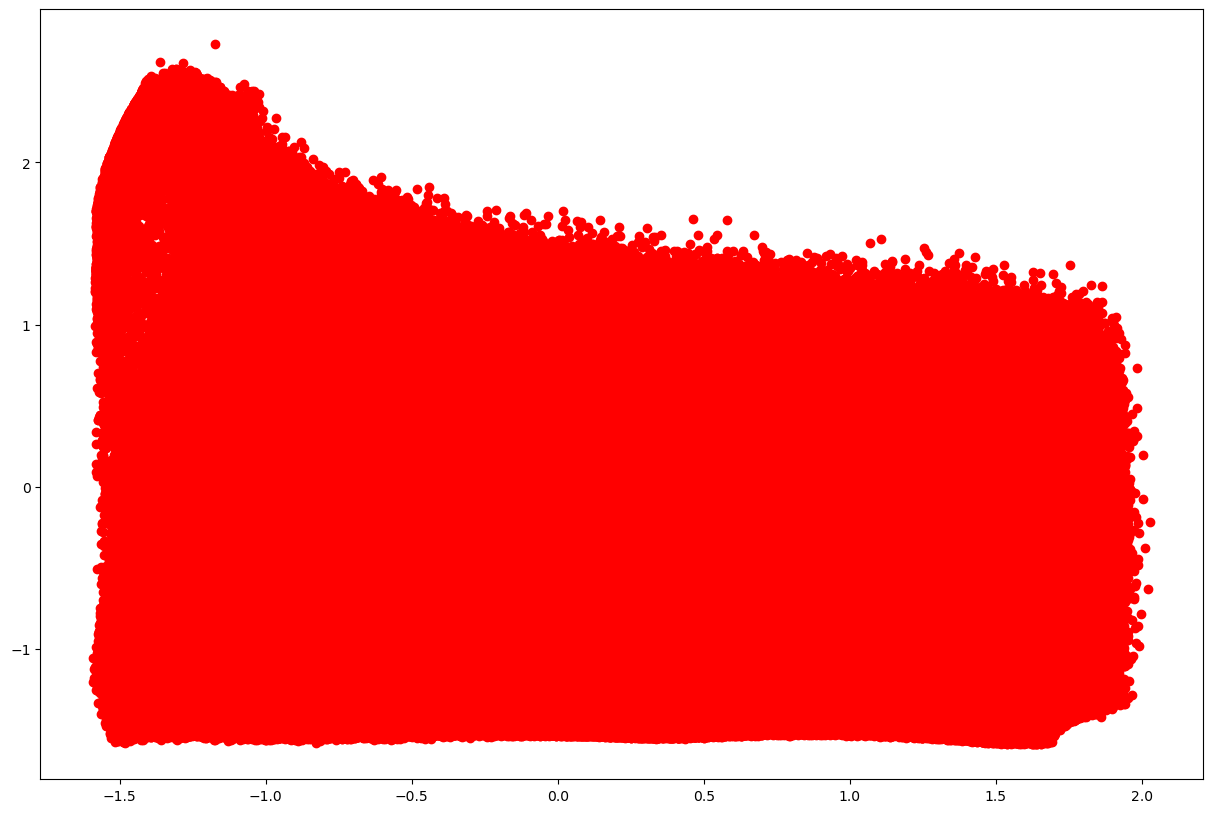

In [48]:
fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(1,1,1, projection='3d')
plt.scatter(y_preds[:,0:1],y_preds[:,1:], color= 'red', label= 'PINN Predicted Position')
# plt.scatter(y_test_Tensor[:,0:1],y_test_Tensor[:,1:],color= 'blue', label = 'Actual Position of particles')

plt.show()

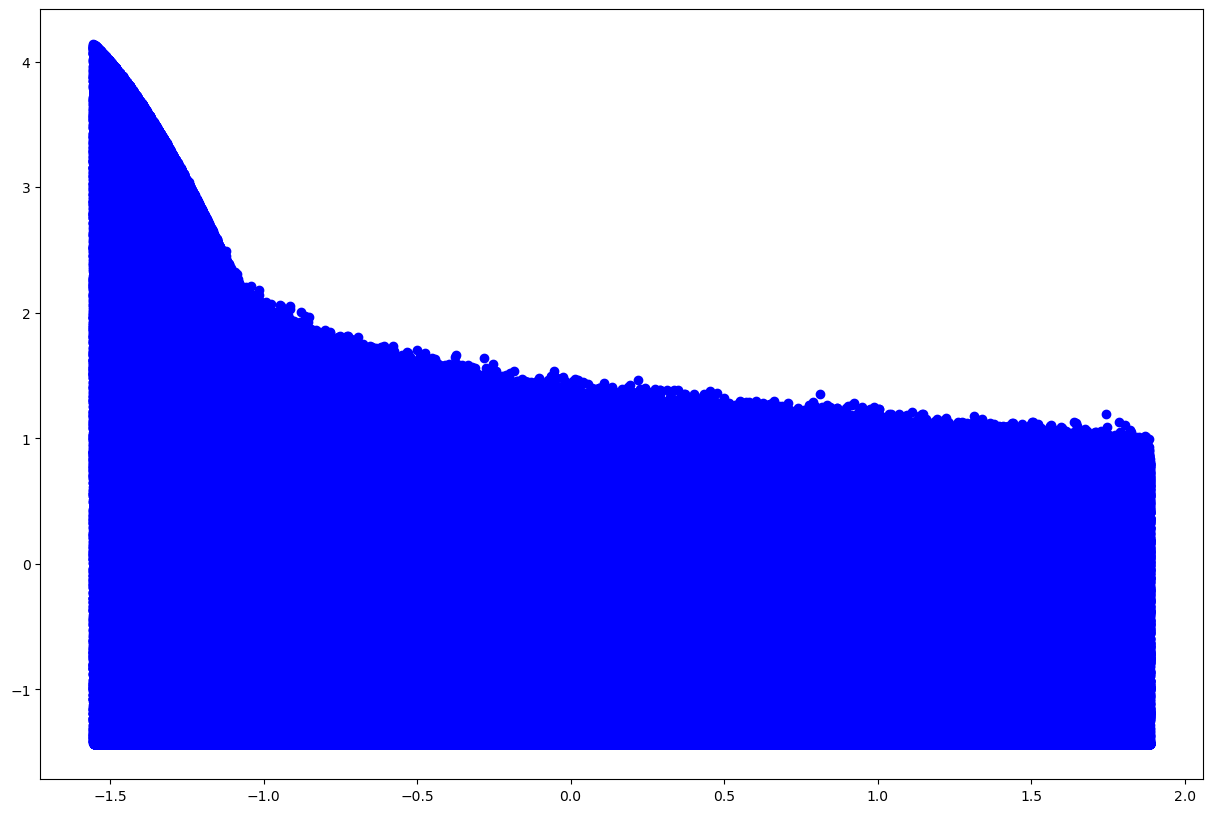

In [49]:
fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(1,1,1, projection='3d')
plt.scatter(y_test_Tensor[:,0:1],y_test_Tensor[:,1:],color= 'blue', label = 'Actual Position of particles')
# plt.scatter(y_preds[:,0:1],y_preds[:,1:], color= 'red', label= 'PINN Predicted Position')


plt.show()

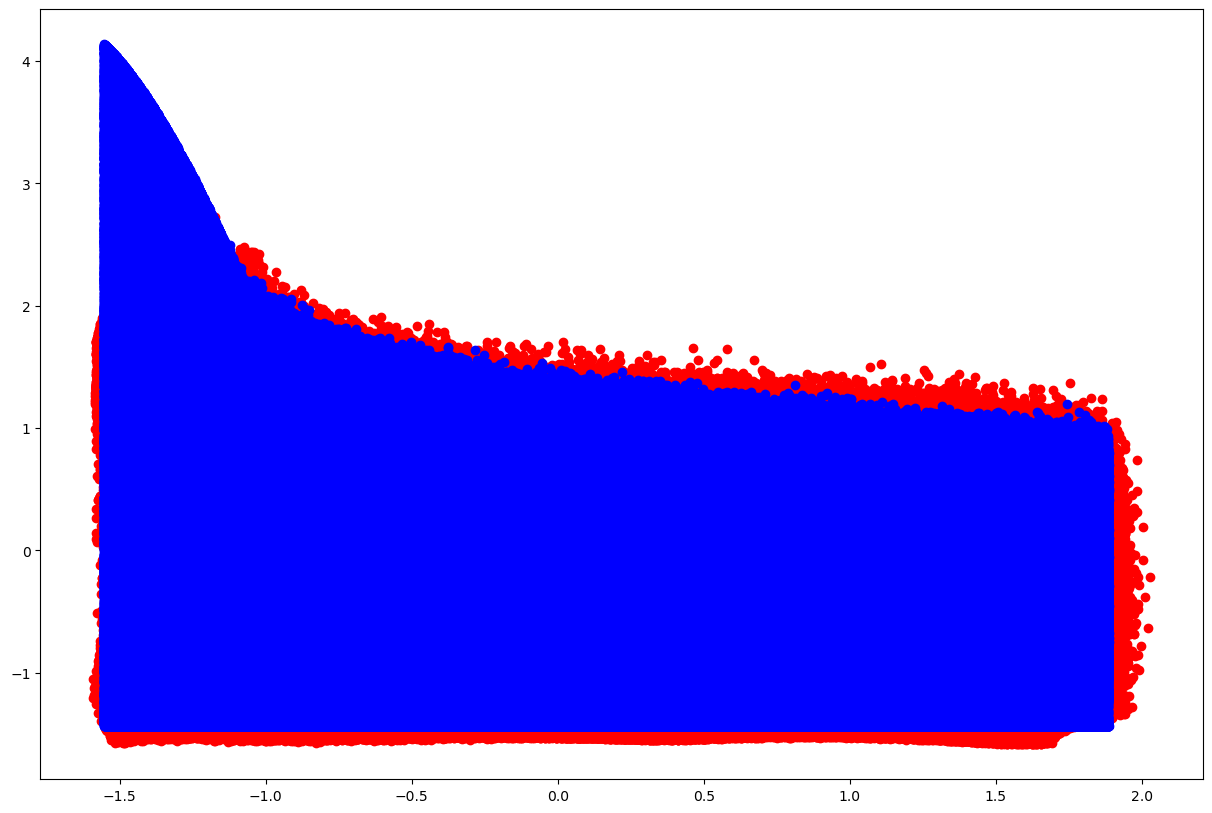

In [50]:
fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(1,1,1, projection='3d')

plt.scatter(y_preds[:,0:1],y_preds[:,1:], color= 'red', label= 'PINN Predicted Position')
plt.scatter(y_test_Tensor[:,0:1],y_test_Tensor[:,1:],color= 'blue', label = 'Actual Position of particles')
plt.savefig('./overlay PINN on actual on 2D plane.png')

plt.show()

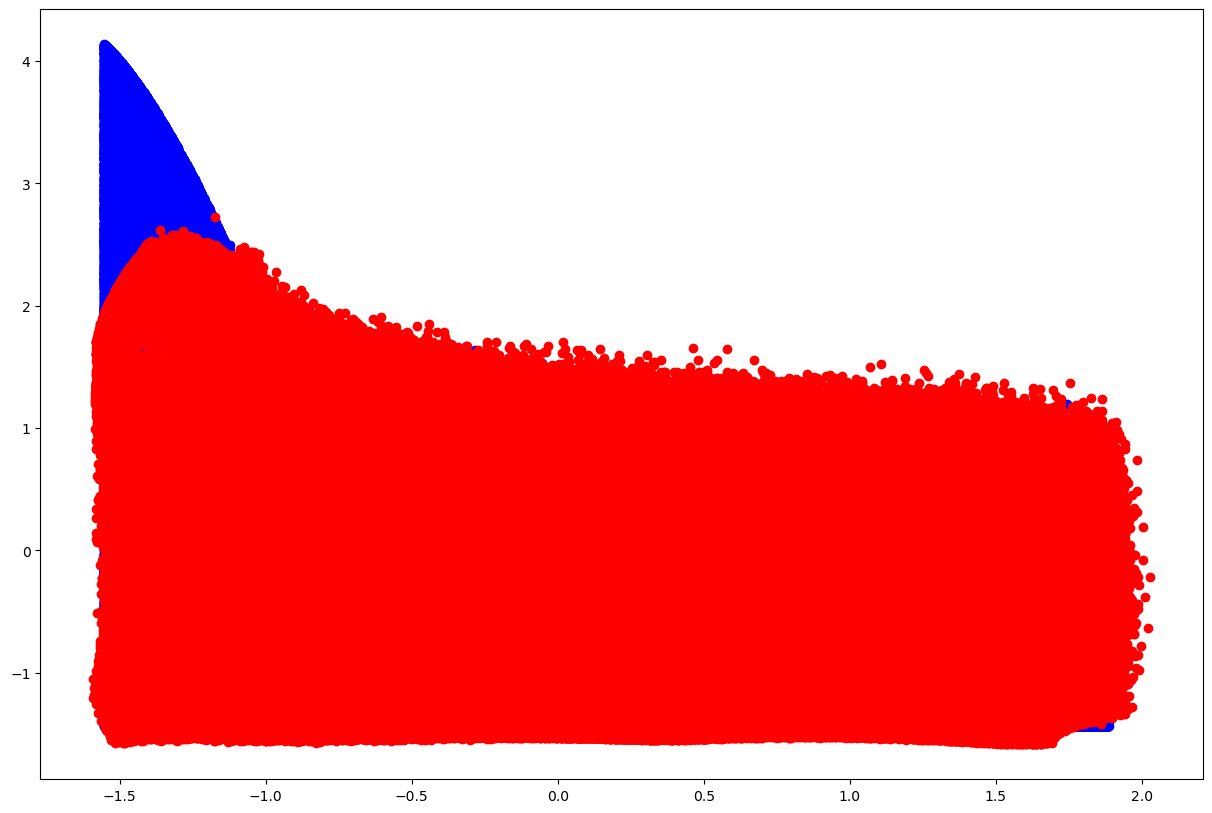

In [51]:
fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(1,1,1, projection='3d')

plt.scatter(y_test_Tensor[:,0:1],y_test_Tensor[:,1:],color= 'blue', label = 'Actual Position of particles')
plt.scatter(y_preds[:,0:1],y_preds[:,1:], color= 'red', label= 'PINN Predicted Position')

plt.savefig('./overlay of actual on PINN in 2D plane.png')

plt.show()

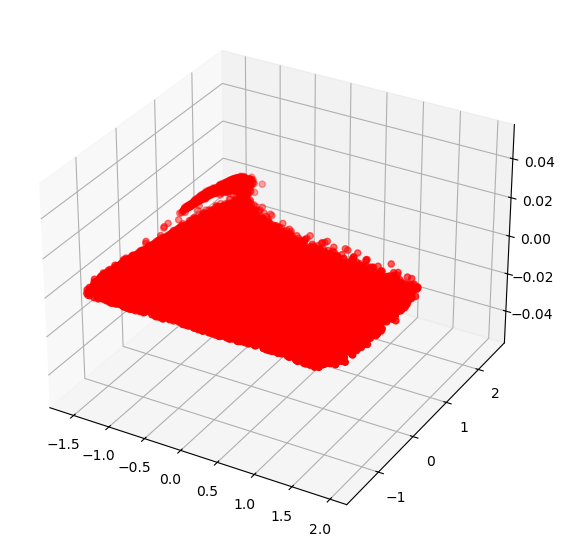

In [52]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1, projection='3d')
# ax.scatter(y_test_Tensor[:20000,0:1],y_test_Tensor[:20000,1:],color= 'blue', label = 'Actual Position of particles')
ax.scatter(y_preds[:20000,0:1],y_preds[:20000,1:], color= 'red', label= 'PINN Predicted Position')
plt.savefig('./PINNs predicted position.png')
plt.show()

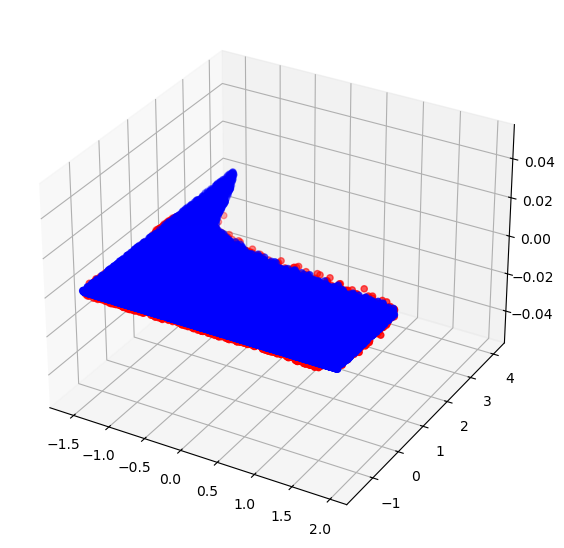

In [53]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(y_test_Tensor[:20000,0:1],y_test_Tensor[:20000,1:],color= 'blue', label = 'Actual Position of particles')
ax.scatter(y_preds[:20000,0:1],y_preds[:20000,1:], color= 'red', label= 'PINN Predicted Position')
plt.savefig('./Combined plot of the Actual and Prediced positions of the particles.png')
plt.show()

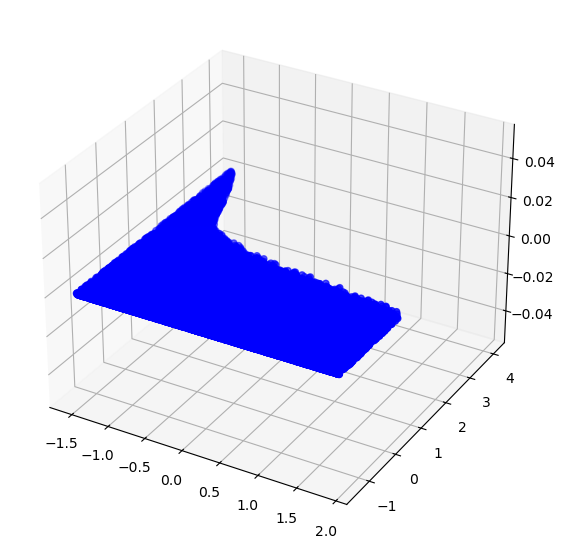

In [54]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(y_test_Tensor[:20000,0:1],y_test_Tensor[:20000,1:],color= 'blue', label = 'Actual Position of particles')
# ax.scatter(y_preds[:20000,0:1],y_preds[:20000,1:], color= 'red', label= 'PINN Predicted Position')
plt.savefig('./Actual position of the particles.png')
plt.show()


In [55]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

metrics ={"r-squared": r2_score, 
          "Mean absolute error (MAE)": mean_absolute_error, 
          "Mean squared error(MSE)":mean_squared_error,          
          
         }
PINNs_scores={}

for key,value in metrics.items():
    PINNs_scores[key]=value(y_test_Tensor.numpy(), y_preds.numpy())


PINNs_scores

{'r-squared': 0.9225327968597412,
 'Mean absolute error (MAE)': 0.15487365,
 'Mean squared error(MSE)': 0.07719275}

In [56]:
scores_table= pd.DataFrame(PINNs_scores.values(), index=PINNs_scores.keys(), columns=["Values"])
scores_table.to_csv('#PINNs_scores.csv')
scores_table

,Values
r-squared,0.922533
Mean absolute error (MAE),0.154874
Mean squared error(MSE),0.077193


In [57]:

y_test_Originaltocsv=pd.DataFrame(
    {
        'yi_scaled': y_test_Tensor[:, 0],
        'yk_scaled': y_test_Tensor[:,1],
        
        })
y_pred_tocsv = pd.DataFrame(
    {
        'yi_pred_scaled': y_preds[:, 0],
        'yk_pred_scaled': y_preds[:,1],
        
        }
    )

PINNs_test_n_predicted_data= pd.concat([y_test_Originaltocsv, y_pred_tocsv], axis=1)
PINNs_test_n_predicted_data = PINNs_test_n_predicted_data.to_csv('PINNs_test_n_predicted_data.csv')
PINNs_test_n_predicted_data

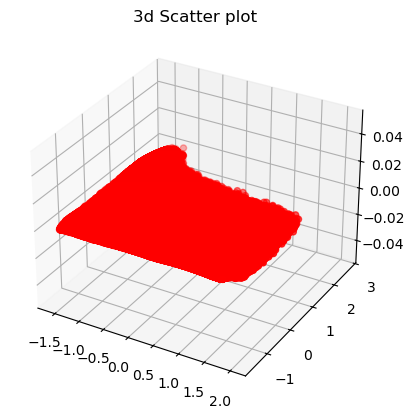

In [59]:
# importing mplot3d toolkits
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')


ax.scatter(y_preds[:,0], y_preds[:,1], color = 'red')

# syntax for plotting
ax.set_title('3d Scatter plot')
plt.show()


In [ ]:
fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')


ax.scatter(y_test_Tensor[:,0], y_test[:,1])

# syntax for plotting
ax.set_title('3d Scatter plot for actual test data')
plt.show()

In [ ]:
y_preds[:20000,1:]

In [ ]:
# @tf.function
# def train_model(model, x, y, optimizer, epochs, batch_size=40000, gravity=9.81/characteristic_acceleration, callbacks=None):
#     """Trains the model using the provided data and parameters."""
#     with tf.device('/GPU:0'):
#       print("x_train shape:", x.shape)
#       print("y_train shape:", y.shape)

#       # Split the dataset, x, into batches
#       dataset = tf.data.Dataset.from_tensor_slices((x, y)) \
#            .batch(batch_size) \
#            .prefetch(tf.data.AUTOTUNE) \
#            .cache()

#       print(len(dataset))
#       print("Dataset Cardinality:", dataset.cardinality().numpy())
#       for epoch in range(epochs):
#         print(f'Now training Epoch: {epoch} ....>')
#         total_loss = 0
#         step = 0

#         # Starting the model training
#         for batch_x, batch_y in dataset:  # Iterate over batches
#           loss = train_step(model, batch_x, batch_y, optimizer, gravity=gravity)
#           total_loss += loss.numpy()
#           step +=1

#           if step % 1 == 0 and epoch % 1==0:
#             print(f"Total Loss: {total_loss/step}")

#     return model

In [ ]:

!nvidia-smi

##2.2 Training a model to predict for i

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps = 1000,
    decay_rate = 0.9
)
optimizerI = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
epochs = 1000
train_model(model, x_train_Tensor[:20000], yI_train_Tensor[:20000], optimizerI, epochs=epochs, batch_size=5000, gravity=9.81/characteristic_acceleration)

In [ ]:

yI_pred_scaled = call_model(model,x_test_Tensor)


In [ ]:
yI_test_Tensor[:, 0:1]

In [ ]:
yi_scaled = yI_test_Tensor[:, 0:1]

In [ ]:
yi_scaled

In [ ]:
yI_pred_scaled

In [ ]:
yi_pred_scaled = yI_pred_scaled[:, 0:1]

In [ ]:
fig, (ax1, ax2)  = plt.subplots(1,2,figsize=(15,5))
ax1.plot(yi_scaled[:20000], color= 'blue', label = 'Actual Position of particles')
ax1.set_xlabel('position in the x direction')
ax1.set_ylabel('position in the y direction')
ax1.set_title('Actual Position of Particles Centroid (i)')


ax2.plot(yi_pred_scaled[:20000], color='red', label= 'PINN solution')
ax2.set_title('Position of Particles Centroid (i) as predicted by PINN')

plt.savefig('[i] Separate plots of Actual Position and Predicted Position for Particle Centroid [i].png')
# plt.legend()

In [ ]:
fig, ax3  = plt.subplots()
ax3.plot(yi_scaled[:20000],color= 'b', label = 'Actual Position of particles')
ax3.plot(yi_pred_scaled[:20000],color= 'r', label= 'PINN Predicted Position')
ax3.set_title('Comparision between the Actual Position and Predicted Position for Particle Centroid [i]')
ax3.set_xlabel('position in the x direction')
ax3.set_ylabel('position in the y direction')
plt.savefig('[i] Comparision between the Actual Position and Predicted Position.png')

plt.legend()

In [ ]:
yI_test_original = scalarYi.inverse_transform(yI_test_scaled).reshape(-1)
yI_pred = scalarYi.inverse_transform(yI_pred_scaled).reshape(-1)


In [ ]:
yi_actual = yI_test_original

yi_pred = yI_pred


In [ ]:
plt.plot(yi_actual[:20000], color='b', label = 'Actual Position of particles')
plt.plot(yi_pred[:20000], color='r', label= 'PINN Predicted Position')
plt.title('Comparision between the Actual Position and Predicted Position')
plt.xlabel('position in the x direction')
plt.ylabel('position in the y direction')
plt.savefig('(Tanh Estimator as the scaler) Comparision between the Actual Position and Predicted Position.png')
plt.legend()

### Plotting the Unscaled (Original) y_test and y_pred data - Particle Centroid (i)*italicised text*

##2.3 Training another model to predict for j

In [ ]:
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)



model_j = create_model()
print(model_j)

In [ ]:
def physics_loss(x, model, gravity=9.81/characteristic_acceleration):

  physloss = 0

  return physloss


In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)

In [ ]:
optimizerJ = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
epochs = 150
train_model(model_j, x_train_Tensor[:2000], yJ_train_Tensor[:2000], optimizerJ, epochs=epochs, batch_size=5000, gravity=9.81/characteristic_acceleration)

In [ ]:
 yJ_pred_scaled = call_model(model_j,x_test_Tensor)

In [ ]:
yj_scaled = yJ_test_Tensor[:, 0:1]
yj_pred_scaled = yJ_pred_scaled[:, 0:1]

In [ ]:
yj_scaled

In [ ]:
yJ_test_Tensor

In [ ]:
yj_pred_scaled

In [ ]:
yj_pred_scaled

In [ ]:
yJ_test_Tensor

In [ ]:
test_tensors = pd.DataFrame(yI_test_Tensor, columns=['y_test(i)'])
test_tensors['y_test(j)'] = yJ_test_Tensor

In [ ]:
test_tensors

In [ ]:
# yJ_test_Tensor[0:1]

In [ ]:
fig, (ax4, ax5)  = plt.subplots(1,2,figsize=(15,5))
ax4.plot(yj_scaled[:20000], color= 'blue', label = 'Actual Position of particles')
ax4.set_title('Actual Position of Particles Centroid (j)')


ax5.plot(yj_pred_scaled[:20000], color='red', label= 'PINN solution')
ax5.set_title('Position of Particles Centroid (j) as predicted by PINN')

plt.savefig('''[j] Separate plots of Actual Position and Predicted Position for
             Particle Centroid [j].png''')
# plt.legend()

In [ ]:
fig, ax6  = plt.subplots()

ax6.plot(yj_scaled,color= 'y', label = 'Actual Position of particles')
ax6.plot(yj_pred_scaled,color= 'violet', label= 'PINN Predicted Position')
ax6.set_title('Comparision between the Actual Position and Predicted Position')

plt.savefig('[j] Comparision between the Actual Position and Predicted Position for Particle Centroid')
plt.legend()

In [ ]:
# import seaborn as sns
# sns.histplot(yj_scaled, kde=True)

##2.4 Training for the Last model to predict for k

In [ ]:
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
# Set the seed for TensorFlow model
tf.random.set_seed(random_seed)


def create_model():
    model = {
        # 'input_layer': tf.keras.layers.Input(shape=(4,)),
        # 'dropout_inputLayer': tf.keras.layers.Dropout(0.2),  # Adding 10% Dropout

        'dense1': tf.keras.layers.Dense(50,
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                        activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout1': tf.keras.layers.Dropout(0.1), # Adding 10% Dropout


        'dense2': tf.keras.layers.Dense(50,
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                        activation= 'tanh',
                                        trainable=True, kernel_initializer='glorot_uniform'),
      'dropout2': tf.keras.layers.Dropout(0.1),  # Adding 10% Dropout


        'dense3': tf.keras.layers.Dense(50,
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                        activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout3': tf.keras.layers.Dropout(0.1) , # Adding 10% Dropout


        'dense4': tf.keras.layers.Dense(50,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout4': tf.keras.layers.Dropout(0.1) , # Adding 10% Dropout


        'dense5': tf.keras.layers.Dense(70,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout5': tf.keras.layers.Dropout(0.2) , # Adding 10% Dropout

   'dense6': tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout6': tf.keras.layers.Dropout(0.2) , # Adding 10% Dropout

           'dense7': tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout7': tf.keras.layers.Dropout(0.2) , # Adding 10% Dropout

           'dense8': tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout8': tf.keras.layers.Dropout(0.2) , # Adding 10% Dropout

        'output_layer': tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
      'dropout_outputLayer': tf.keras.layers.Dropout(0.2),  # Adding 10% Dropout

    }
    return model

model = create_model()
print(model)

In [ ]:
def call_model(model,x):
  """

  Args:
    model:
    x:

  Returns:

  """
  # x = model['input_layer'](x)
  # x= model['dropout_inputLayer'](x)
  x = model['dense1'](x)
  x= model['dropout1'](x)
  x = model['dense2'](x)
  x= model['dropout2'](x)
  # x = model['dense3'](x)
  # x= model['dropout3'](x)
  # x = model['dense4'](x)
  # x= model['dropout4'](x)
  # # x = model['dense5'](x)
  # x= model['dropout5'](x)
  # x = model['dense6'](x)
  # x= model['dropout6'](x)
  # x = model['dense7'](x)
  # x= model['dropout7'](x)
  # x = model['dense8'](x)
  # x= model['dropout8'](x)
  x = model['output_layer'](x)
  x= model['dropout_outputLayer'](x)

  return x

In [ ]:
def physics_loss(x, model, gravity=9.81/characteristic_acceleration):
  v= x[:, 1]
  t= x[:,0]
  with tf.GradientTape(persistent=True) as tape2:
    tape2.watch(x)
    with tf.GradientTape(persistent=True) as tape1:
      tape1.watch(x)
      outputs=call_model(model,x)
      # outputs = y

      # tape.watch(x)
    dy_x = tape1.gradient(outputs,x)
    del tape1
    dy_t, dy_u, dy_v,dy_w = tf.split(dy_x, 4, axis=1)

  #Finding the Second derivative
  ddy_xx=tape2.gradient(dy_t,x) #I need to check this code again and compare the result with that of: d_test =tape2.gradient(dy_x,x)
  del tape2
  ddy_tt, ddy_uu, ddy_vv, ddy_ww = tf.split(ddy_xx, 4, axis=1)
  accel = ddy_tt

  # Finding F= ma
  m=1 #the mass is assumed to be 1
  F= m*accel


  resultant_force = F- m*gravity*tf.math.sin(0.663225)

  # Finding physics_loss - The physics_loss (expressed as physloss) is equal to
  # the MSE of F
  physloss = (tf.square(resultant_force))

  return physloss


In [ ]:
# physics_loss(x_train_Tensor[:2000], model_k)

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

In [ ]:
optimizerK = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
# Set the seed for TensorFlow model
tf.random.set_seed(random_seed)

model_k = create_model()

# epochs =2000
# for epoch in range(epochs):
#     loss = train_step(model_k, x_train_Tensor,yK_train_Tensor, optimizerK, gravity=9.81/characteristic_acceleration)
#     if epoch % 100 == 0:
#         print(f"Epoch {epoch}, Loss: {loss.numpy()}")

In [ ]:
def total_loss(model,x, y, gravity=9.81/characteristic_acceleration):
    y_PINNdnnpreds = call_model(model, x)

    # print("Shape of y_PINNdnnpreds:", y_PINNdnnpreds.shape)
    # print("Shape of y_train:", y.shape)

    data_loss = tf.square(y_PINNdnnpreds - y)

    phys_loss = physics_loss(x, model, gravity=gravity)

    total_loss = tf.reduce_mean(data_loss + phys_loss)
    # print(total_loss)
    # print(data_loss+phys_loss)

    return total_loss

In [ ]:
@tf.function
def train_model(model, x, y, optimizer, epochs, batch_size=40000, gravity=9.81/characteristic_acceleration, callbacks=None):
    """Trains the model using the provided data and parameters."""
    with tf.device('/GPU:0'):
      print("x_train shape:", x.shape)
      print("y_train shape:", y.shape)
      # x = tf.reshape(x, (1, x.shape[0],x.shape[1]))
      # y = tf.reshape(y, (1, y.shape[0],y.shape[1]))
      dataset = tf.data.Dataset.from_tensor_slices((x, y)) \
           .batch(batch_size) \
           .prefetch(tf.data.AUTOTUNE) \
           .cache()

      print(len(dataset))
      print("Dataset Cardinality:", dataset.cardinality().numpy())
      for epoch in range(epochs):
        print(f'Now training Epoch: {epoch} ....>')
        total_loss = 0
        step = 0
        for batch_x, batch_y in dataset:  # Iterate over batches
          loss = train_step(model, batch_x, batch_y, optimizer, gravity=gravity)
          total_loss += loss.numpy()
          step +=1

          if step % 1 == 0 and epoch % 50==0:
            # print(f"Epoch {epoch}, Step {step}, Loss: {loss.numpy()}")
            print(f"Total Loss: {total_loss/step}")

    return model

In [ ]:
epochs =200
train_model(model_k, x_train_Tensor, yK_train_Tensor, optimizerK, epochs=epochs, batch_size=22500, gravity=9.81/characteristic_acceleration)



In [ ]:
yK_pred_scaled = call_model(model_k,x_test_Tensor)

In [ ]:
# a= tf.convert_to_tensor([2,3,4,5], dtype=tf.float32)
# b= tf.convert_to_tensor([6,7,8,9], dtype=tf.float32)
# a= tf.reshape(a, (4, 1))
# b= tf.reshape(b, (4, 1))
# d =tf.concat([a,b], axis=1)

# d

In [ ]:
yK_test_scaled

In [ ]:
yK_pred_scaled

In [ ]:
# tf.reduce_mean(yk_scaled - yK_pred_scaled)

In [ ]:
# import tensorflow_probability as tfp

# tfp.stats.percentile(yk_scaled - yK_pred_scaled, 50.0, interpolation='midpoint')

In [ ]:
yk_scaled = yK_test_Tensor[:, 0:1]
yk_pred_scaled = yK_pred_scaled[:, 0:1]

In [ ]:
plt.plot(yk_scaled,color= 'black', label = 'Actual Position of particles')
plt.plot(yk_pred_scaled,color= 'brown', label= 'PINN Predicted Position')
plt.title('Comparision between the Actual Position and Predicted Position')
# plt.xlabel('')
# plt.ylabel('')
plt.savefig('Actual and Predicted for j direction.png')
plt.legend()

##2.5  Combining the results of the three Models together

In [ ]:
fig, ax7 = plt.subplots(figsize=(15,10))
# ax = fig.add_subplot(1,2,1, projection='3d')

ax7.scatter(yi_scaled,yk_scaled,color= 'blue', label = 'Actual Position of particles')
ax7.scatter(yi_pred_scaled,yk_pred_scaled,color= 'red', label= 'PINN Predicted Position')
ax7.set_title('Comparision between the Actual Position and Predicted Position for Particle Centroid [Z]')

plt.savefig('[k] Comparision between the Actual Position and Predicted Position for Particle Centroid.png')
plt.legend()

In [ ]:
 fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1, projection='3d')
# ax.scatter(yi_scaled[:20000],yj_scaled[:20000],yk_scaled[:20000],color= 'blue', label = 'Actual Position of particles')
ax.scatter3D(yi_pred_scaled[:20000],yk_pred_scaled[:20000],color= 'red', label= 'PINN Predicted Position')


In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter3D(yi_scaled[:20000],yk_scaled[:20000],color= 'blue', label= 'PINN Predicted Position')

##2.6 Saving the testing data and predicted data as csv files

In [ ]:
tf.reduce_max(yj_scaled)

In [ ]:
y_test_Originaltocsv=pd.DataFrame(
    {
        'yi_scaled': yi_scaled.numpy().flatten(),
        'yj_scaled': yj_scaled.numpy().flatten(),
        'yk_scaled': yk_scaled.numpy().flatten()
        })
y_pred_tocsv = pd.DataFrame(
    {
        'yi_pred_scaled': yi_pred_scaled.numpy().flatten(),
        'yj_pred_scaled': yj_pred_scaled.numpy().flatten(),
        'yk_pred_scaled': yk_pred_scaled.numpy().flatten()
        }
    )

PINN_test_n_predicted_data= pd.concat([y_test_Originaltocsv, y_pred_tocsv], axis=1)
PINN_test_n_predicted_data = PINN_test_n_predicted_data.to_csv('PINN_test_n_predicted_data.csv')
PINN_test_n_predicted_data

In [ ]:
y_test_Originaltocsv

##2.7 Using Two Planes x and z while y is constant, using y= 1.5

In [ ]:

yj_constant =[]
for i in range(len(yj_scaled)):
    yj_constant.append(1.5)

yj_constant = tf.convert_to_tensor(yj_constant, dtype=tf.float32)
# yj_constant = tf.reshape(yj_constant, (len(yj_constant), 1))
print(
    '''
    The length of yj_constant is: {}

    ---------------------------------------------------------------------------------------------------------------------
    The length of yj_scaled is: {}
    '''.format(len(yj_constant), len(yj_scaled))
    )

In [ ]:
y_test_Originaltocsv=pd.DataFrame(
    {
        'yi_scaled': yi_scaled.numpy().flatten(),
        'yj_scaled': yj_scaled.numpy().flatten(),
        'yk_scaled': yk_scaled.numpy().flatten()
        })
y_pred_tocsv = pd.DataFrame(
    {
        'yi_pred_scaled': yi_pred_scaled.numpy().flatten(),
        'yj_pred_scaled': yj_constant.numpy().flatten(),
        'yk_pred_scaled': yk_pred_scaled.numpy().flatten()
        }
    )

PINN_test_n_predicted_data= pd.concat([y_test_Originaltocsv, y_pred_tocsv], axis=1)
PINN_test_n_predicted_data = PINN_test_n_predicted_data.to_csv('(Constant)PINN_test_n_predicted_data.csv')
PINN_test_n_predicted_data

#3.0 Evaluating the model
  To evaluate the model, we will be finding its:
  - R-squared score
  - Mean Squared Error (MSE) and
  - Normalised Mean Square Error Value (NMSE)


##3.1 Calculating the R-square

$$  R^2 = 1 - \frac {sum of squared regression (SSR)}{total sum of squares (BST)}) $$

$$   = 1 - \frac {\sum(y_{i} - \hat{y}_{pred})^{2}}{\sum(y_i - \bar{y})^{2}} $$


In [ ]:
actual_values = tf.concat([yi_scaled, yk_scaled], axis=1)
predicted_values = tf.concat([yi_pred_scaled, yk_pred_scaled], axis=1)

SSR = tf.reduce_sum(tf.square(actual_values-predicted_values))
SST = tf.reduce_sum(tf.square(actual_values-tf.reduce_mean(actual_values)))

R_squared = 1 - (SSR/SST)
R_squared_value = R_squared.numpy()
print("R-squared (R²):", R_squared_value)

## 3.2 Calculating the Mean Squared Error

$$ MSE = \frac{\sum \limits_{1}^{n} (y_{i} - y_{pred})^{2}}{n}$$

where $y_i$ represents the actual values <br>
&emsp; &emsp;     $ y_{pred}$ represents the predicted values
<br>
&emsp;&emsp; $n$ represent the total number of observations

In [ ]:


# Calculating the MSE
mse = tf.reduce_mean(tf.square(actual_values - predicted_values))

# Evaluate the MSE
mse_value = mse.numpy()
print("Mean Squared Error (MSE):", mse_value)

## 3.3 Calculating the NMSE

$$ NMSE= \frac{MSE}{variance of the actual values} $$
        <br>
        OR,
     $$ NMSE = \frac{SSR}{SST} $$

In [ ]:
# Calculate variance of actual values
variance_actual = tf.reduce_mean(tf.square(actual_values - tf.reduce_mean(actual_values)))

# Calculate NMSE
nmse = (mse / variance_actual) * 100
nmse_value = nmse.numpy()
print("Normalized Mean Squared Error (NMSE) as a percentage:", nmse_value)


## Showing that: $$ R^{2} + NMSE = 1 $$

In [ ]:
R_squared_value + nmse_value/100

# Appendix

In [ ]:
import matplotlib.pyplot as plt

residuals = actual_values - predicted_values




# Scatter plot for each component (i, j, k)
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Plot residuals for component i
axs[0].scatter(range(len(residuals[:, 0])), residuals[:, 0], alpha=0.5)
axs[0].axhline(y=0, color='r', linestyle='--')
axs[0].set_title('Residuals for Component i')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Residuals (yi_actual - yj_pred)')

# Plot residuals for component k
axs[1].scatter(range(len(residuals[:, 1])), residuals[:, 1], alpha=0.5)
axs[1].axhline(y=0, color='r', linestyle='--')
axs[1].set_title('Residuals for Component k')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Residuals (yk_actual - y_predk)')



plt.tight_layout()
plt.show()


In [ ]:
pd.DataFrame(residuals, columns=['residuals(i)', 'residuals(k)'])

In [ ]:
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
# Set the seed for TensorFlow model
tf.random.set_seed(random_seed)

model_k = create_model()

# epochs =2000
# for epoch in range(epochs):
#     loss = train_step(model_k, x_train_Tensor,yK_train_Tensor, optimizerK, gravity=9.81/characteristic_acceleration)
#     if epoch % 100 == 0:
#         print(f"Epoch {epoch}, Loss: {loss.numpy()}")

In [ ]:
optimizerK = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
@tf.function
def train_model(model, x, y, optimizer, epochs, batch_size=40000, gravity=9.81/characteristic_acceleration, yi_scaled =yi_scaled, yi_pred_scaled=yi_pred_scaled, yk_scaled = yk_scaled, callbacks=None):
    """Trains the model using the provided data and parameters."""
    with tf.device('/GPU:0'):
      print("x_train shape:", x.shape)
      print("y_train shape:", y.shape)
      # x = tf.reshape(x, (1, x.shape[0],x.shape[1]))
      # y = tf.reshape(y, (1, y.shape[0],y.shape[1]))
      dataset = tf.data.Dataset.from_tensor_slices((x, y)) \
           .batch(batch_size) \
           .prefetch(tf.data.AUTOTUNE) \
           .cache()

      print(len(dataset))
      print("Dataset Cardinality:", dataset.cardinality().numpy())
      for epoch in range(epochs):
        print(f'Now training Epoch: {epoch} ....>')
        total_loss = 0
        step = 0
        for batch_x, batch_y in dataset:  # Iterate over batches
          loss = train_step(model, batch_x, batch_y, optimizer, gravity=gravity)
          total_loss += loss.numpy()
          step +=1

          if step % 310 == 0 and epoch % 50==0:
            # print(f"Epoch {epoch}, Step {step}, Loss: {loss.numpy()}")
            print(f"Total Loss: {total_loss/step}")

            yK_pred_scaled = call_model(model_k,x_test_Tensor)

            yk_pred_scaled = yK_pred_scaled[:, 0:1]



            fig, ax7 = plt.subplots(figsize=(15,10))
            # ax = fig.add_subplot(1,2,1, projection='3d')

            ax7.scatter(yi_scaled,yk_scaled,color= 'blue', label = 'Actual Position of particles')
            ax7.scatter(yi_pred_scaled,yk_pred_scaled,color= 'red', label= 'PINN Predicted Position')
            ax7.set_title(f'Epoch: {epoch}')

            plt.savefig('[k] Comparision between the Actual Position and Predicted Position for Particle Centroid.png')
            plt.legend()
            plt.show()
            plt.clf()
            plt.close()


    return model

In [ ]:
epochs =1650
train_model(model_k, x_train_Tensor, yK_train_Tensor, optimizerK, epochs=epochs, batch_size=22500, gravity=9.81/characteristic_acceleration)